# Project name: Civil Servants Remuneration in the EU
## Preliminary analysis
### Part 2: EU Civil Servant average salary
#### Step 2: Data visualization

In [13]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# load data
df_salary = pd.read_csv('/Volumes/GoogleDrive-114951830941804947409/My Drive/Data analyst/Projects/Civil_Servant_Salary_EU/modified_data/2. EU Civil Servant average salary.csv')

In [15]:
df_salary[df_salary['salary'] == df_salary['salary'].min()]

,time,geo,salary
10,2014,Croatia,0.0
22,2014,Romania,0.0
25,2014,Finland,0.0
38,2015,Croatia,0.0
66,2016,Croatia,0.0


<Figure size 1440x360 with 0 Axes>

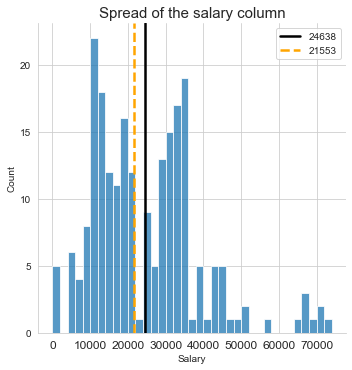

In [16]:
# check the distribution of data
## Create bins with step-size 5
bins = np.arange(df_salary['salary'].min(), df_salary['salary'].max()+2000, 2000)
plt.figure(figsize=[20,5])

sns.displot(x=df_salary['salary'], bins=bins)
plt.axvline(df_salary['salary'].mean(), c='k', ls='-', lw=2.5, label='{:.0f}'.format(df_salary['salary'].mean()))
plt.axvline(df_salary['salary'].median(), c='orange', ls='--', lw=2.5, label='{:.0f}'.format(df_salary['salary'].median()))
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Spread of the salary column', fontsize=15)
plt.xticks(fontsize=12)
plt.legend()
plt.show();

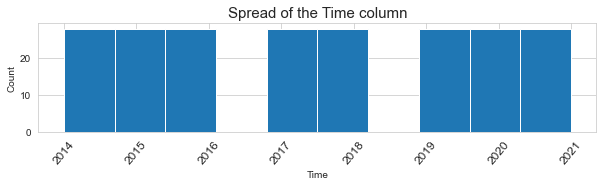

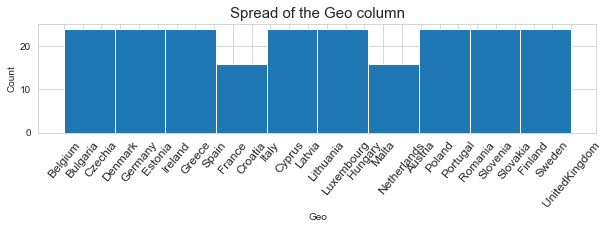

In [17]:
# loop through the qualitative data columns to check the spread
for i in range(0, 2):
    x = df_salary.columns[i]
    plt.figure(figsize=[10,2])
    plt.hist(data=df_salary, x=x)
    plt.xlabel(f'{x.title()}')
    plt.ylabel('Count')
    plt.title(f'Spread of the {x.title()} column', fontsize=15)
    plt.xticks(rotation=50, fontsize=12)
    plt.show();

#### View the level of average salaries by increments of 25%

In [18]:
# group data by geolocation
df_total = df_salary.groupby("geo", as_index=False)["salary"].mean()

In [19]:
# check the bin values by increments of 25%
df_total.describe()[3:]

,salary
min,4769.7000
25%,13888.8375
50%,23105.8500
75%,32933.8500
max,69259.6500


In [20]:
# assign the bins
bin_edges = [int(df_total.describe()[3:].values[0]), # min values
             int(df_total.describe()[3:].values[1]), # 25% value
             int(df_total.describe()[3:].values[2]), # 50% value
             int(df_total.describe()[3:].values[3]), # 75% value
             int(df_total.describe()[3:].values[4]+1)] # max values
bin_names = ['below 25%', 'between 25%-50%', 'between 50%-75%', 'above 75%']

# cut the bins and add them to the new column
df_total['level'] = pd.cut(df_total['salary'], bin_edges, labels=bin_names)

# change the data type to categories
bin_cat = pd.api.types.CategoricalDtype(ordered=True, categories=bin_names)
df_total['level'] = df_total['level'].astype(bin_cat)

In [21]:
df_total

,geo,salary,level
0,Austria,33391.050000,above 75%
1,Belgium,33645.900000,above 75%
2,Bulgaria,8357.850000,below 25%
3,Croatia,7478.400000,below 25%
4,Cyprus,26818.350000,between 50%-75%
5,Czechia,18220.200000,between 25%-50%
6,Denmark,38922.150000,above 75%
7,Estonia,26010.000000,between 50%-75%
8,Finland,35508.450000,above 75%
9,France,30745.800000,between 50%-75%


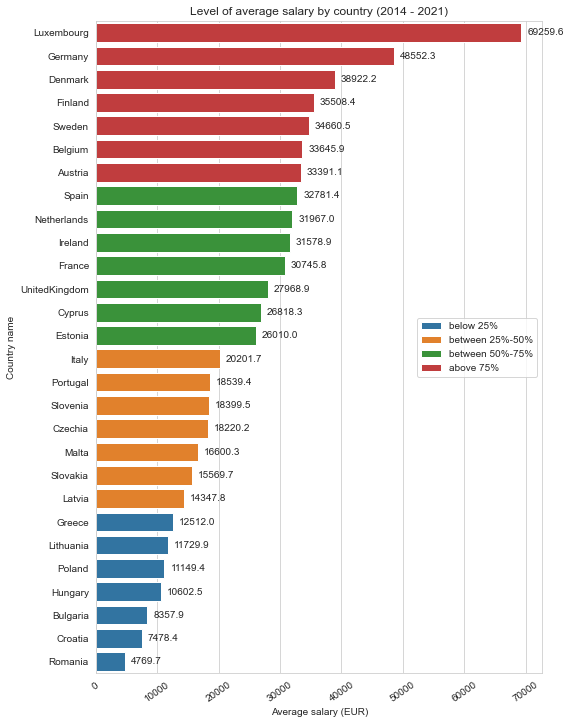

In [24]:
# create a matplotlib figure
f, ax = plt.subplots(figsize=(8, 12))

# load the salary dataset
salary = df_total.sort_values("salary", ascending=False)

# plot the average salary data
sns.barplot(x="salary",
            y="geo",
            hue="level",
            data=salary,
            dodge=False)

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True)

plt.title("Level of average salary by country (2014 - 2021)")
plt.xlabel("Average salary (EUR)")
plt.xticks(rotation=35)
plt.ylabel("Country name")
sort = df_total['salary'].sort_values(ascending=False).reset_index(drop='index')
for i in range(sort.shape[0]):
    # iterrate through the sorted values
    value = sort[i]
    # convert value into string
    pct_string = '{:0.1f}'.format(value)
    # Print the string value on the bar.
    plt.text(value+1000, i, pct_string, va='center');